In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

class HyperParams:
    pass
hyperparams = HyperParams()

hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 300
hyperparams.BATCH_SIZE = 32

hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0001_0100"
MODEL_NAME = "0001_0100-64-aeconnect-xxe4"

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', MODEL_NAME))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0174
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.8130

from tensorflow.keras.optimizers import Adam
hyperparams.OPTIMIZER = Adam(0.0005,beta_1=0.9)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelD as train
import ReportsK as reports
import AEConnectionsF as model_factory

In [4]:
##################
# MODEL DEFINITION
##################
model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 64, 64, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   18496       leaky_re_lu[0][0]                
______________________________________________________________________________________________

{'name': 'Adam',
 'learning_rate': 0.0005,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = \
            dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = \
            dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/
Noisy files:8086
Nitid files:8086
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/validation/
Noisy files:2000
Nitid files:2000


In [6]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

checkpoint_filepath = os.path.abspath(os.path.join('../../../saves/') + MODEL_NAME \
                                      + "_checkpoint_" + '_weights_{epoch:02d}-{val_loss:.2f}')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience = 50, \
                 callbacks=[model_checkpoint_callback] )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/300
253/253 [==============================] - 12s 28ms/step - loss: 0.0517 - val_loss: 0.0430
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-aeconnect-xxe4_checkpoint__weights_01-0.04\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/300
253/253 [==============================] - 7s 25ms/step - loss: 0.0352 - val_loss: 0.0417
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-aeconnect-xxe4_checkpoint__weights_02-0.04\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/300
253/253 [==============================] - 7s 26ms/step - loss: 0.0343 - val_loss: 0.0404
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-aeconnect-xxe4_checkpoint__weights_03-0.04\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 4/300
253/253 [==============================] - 7s 25ms/step - loss: 0.0338 - val_loss: 0.0462
Epoch 5/300
253/253 [==============================] - 6s 25ms/step - loss: 0.0334 - val_loss: 0.0478
Epoch 6/300
253/253 [==============================] - 6s 25ms/step - loss: 0.0328 - val_loss: 0.0397
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-aeconnect-xxe4_checkpoint__weights_06-0.04\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 7/300
253/253 [==============================] - 7s 25ms/step - loss: 0.0326 - val_loss: 0.0547
Epoch 8/300
253/253 [==============================] - 6s 25ms/step - loss: 0.0319 - val_loss: 0.0392
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-aeconnect-xxe4_checkpoint__weights_08-0.04\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 9/300
253/253 [==============================] - 7s 25ms/step - loss: 0.0320 - val_loss: 0.0419
Epoch 10/300
253/253 [==============================] - 6s 25ms/step - loss: 0.0309 - val_loss: 0.0404
Epoch 11/300
253/253 [==============================] - 6s 25ms/step - loss: 0.0302 - val_loss: 0.0402
Epoch 12/300
253/253 [==============================] - 6s 25ms/step - loss: 0.0291 - val_loss: 0.0402
Epoch 13/300
253/253 [==============================] - 6s 25ms/step - loss: 0.0284 - val_loss: 0.0437
Epoch 14/300
253/253 [==============================] - 6s 25ms/step - loss: 0.0271 - val_loss: 0.0419
Epoch 15/300
253/253 [==============================] - 6s 25ms/step - loss: 0.0260 - val_loss: 0.0433
Epoch 16/300
253/253 [==============================] - 6s 25ms/step - loss: 0.0249 - val_loss: 0.0430
Epoch 17/300
253/253 [==============================] - 6s 25ms/step - loss: 0.0235 - val_loss: 0.0421
Epoch 18/300
253/253 [==============================] - 6s 25ms/step - los

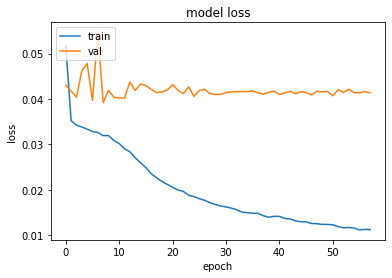

Best Epoch:8


In [7]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [8]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Black image found
Images count =2000
Best RMSENZ  =1937 (0.97)
Best MAENZ   =1905 (0.95)
Best PSNR    =1937 (0.97)
Best Accuracy=1707 (0.85)
RMSE-NZ  Pred=0.0477  Noisy=0.1151
MAE-NZ   Pred=0.0392  Noisy=0.0945
PSNR     Pred=12.4 dB Noisy=5.1 dB
Accuracy Pred=0.30    Noisy=0.12
SSM      Pred=0.85    Noisy=0.30
HOG MSE  Pred=0.11    Noisy=0.15


In [9]:
model.save(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-aeconnect-xxe4\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [10]:
reports.saveMetrics( DEST_TESTS, MODEL_NAME, predictions_headers, predictions_metrics )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test/
Noisy files:15
Nitid files:15
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_06_00_0_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_06_00_0_nitid_idx076.tif


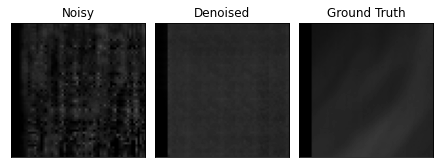

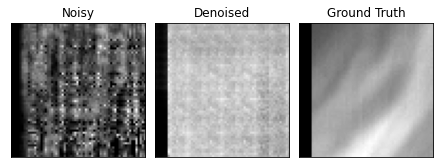

RMSE-NZ  Pred=0.0352  Noisy=0.0762 BEST
MAE-NZ   Pred=0.0289  Noisy=0.0607 BEST
PSNR     Pred=16.0 dB Noisy=9.3 dB BEST
Accuracy Pred=0.20    Noisy=0.11 BEST
SSM      Pred=0.86    Noisy=0.38
HOG MSE  Pred=0.07    Noisy=0.15
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_00_9_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_00_9_nitid_idx076.tif


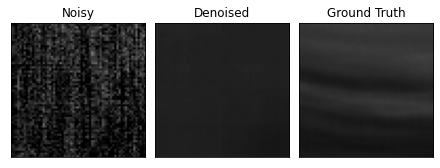

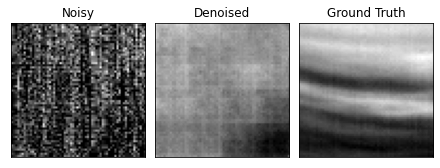

RMSE-NZ  Pred=0.0572  Noisy=0.1043 BEST
MAE-NZ   Pred=0.0468  Noisy=0.0869 BEST
PSNR     Pred=12.9 dB Noisy=7.7 dB BEST
Accuracy Pred=0.16    Noisy=0.06 BEST
SSM      Pred=0.89    Noisy=0.12
HOG MSE  Pred=0.26    Noisy=0.22
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_11_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_11_nitid_idx076.tif


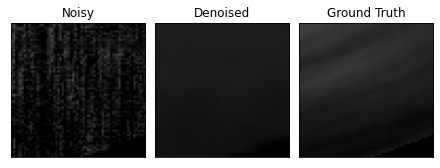

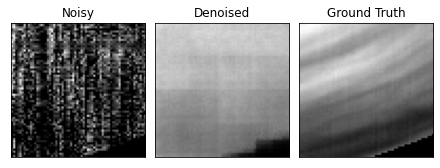

RMSE-NZ  Pred=0.0536  Noisy=0.0960 BEST
MAE-NZ   Pred=0.0441  Noisy=0.0800 BEST
PSNR     Pred=13.5 dB Noisy=8.4 dB BEST
Accuracy Pred=0.10    Noisy=0.06 BEST
SSM      Pred=0.85    Noisy=0.23
HOG MSE  Pred=0.14    Noisy=0.21
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_2_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_2_nitid_idx076.tif


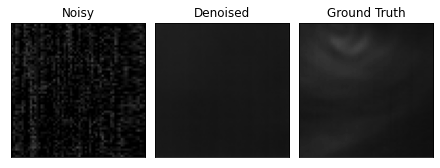

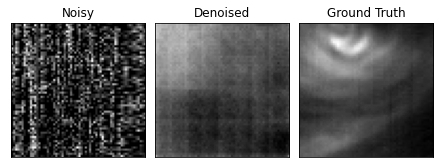

RMSE-NZ  Pred=0.0382  Noisy=0.0938 BEST
MAE-NZ   Pred=0.0284  Noisy=0.0805 BEST
PSNR     Pred=16.9 dB Noisy=9.1 dB BEST
Accuracy Pred=0.26    Noisy=0.06 BEST
SSM      Pred=0.91    Noisy=0.21
HOG MSE  Pred=0.13    Noisy=0.11
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_00_15_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_00_15_nitid_idx076.tif


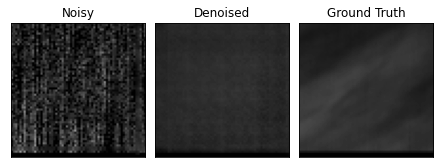

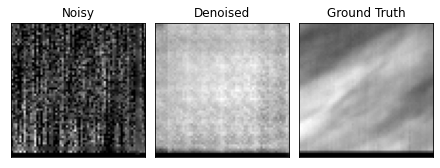

RMSE-NZ  Pred=0.0438  Noisy=0.1126 BEST
MAE-NZ   Pred=0.0353  Noisy=0.0917 BEST
PSNR     Pred=16.3 dB Noisy=8.1 dB BEST
Accuracy Pred=0.19    Noisy=0.07 BEST
SSM      Pred=0.80    Noisy=0.14
HOG MSE  Pred=0.08    Noisy=0.27
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_01_7_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_01_7_nitid_idx076.tif


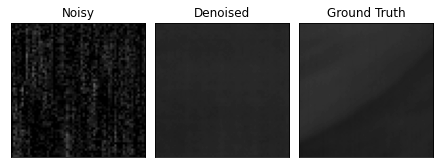

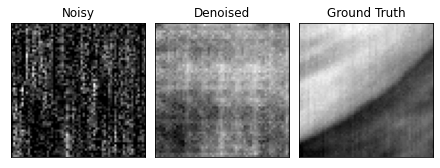

RMSE-NZ  Pred=0.0290  Noisy=0.1147 BEST
MAE-NZ   Pred=0.0250  Noisy=0.1006 BEST
PSNR     Pred=17.2 dB Noisy=5.2 dB BEST
Accuracy Pred=0.19    Noisy=0.05 BEST
SSM      Pred=0.92    Noisy=0.15
HOG MSE  Pred=0.16    Noisy=0.19
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0362_04_01_15_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0362_04_01_15_nitid_idx076.tif


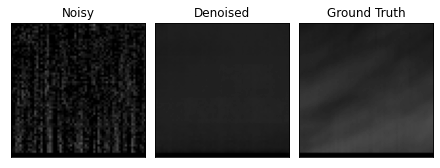

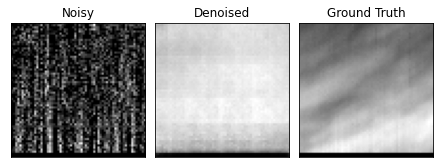

RMSE-NZ  Pred=0.0762  Noisy=0.1357 BEST
MAE-NZ   Pred=0.0565  Noisy=0.1172 BEST
PSNR     Pred=11.7 dB Noisy=6.6 dB BEST
Accuracy Pred=0.21    Noisy=0.04 BEST
SSM      Pred=0.85    Noisy=0.18
HOG MSE  Pred=0.05    Noisy=0.25
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0363_00_00_0_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0363_00_00_0_nitid_idx076.tif


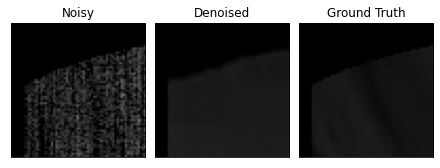

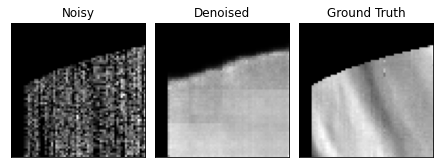

RMSE-NZ  Pred=0.0228  Noisy=0.1015 BEST
MAE-NZ   Pred=0.0157  Noisy=0.0807 BEST
PSNR     Pred=14.1 dB Noisy=1.2 dB BEST
Accuracy Pred=0.48    Noisy=0.10 BEST
SSM      Pred=0.91    Noisy=0.43
HOG MSE  Pred=0.08    Noisy=0.08
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_01_01_8_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_01_01_8_nitid_idx076.tif


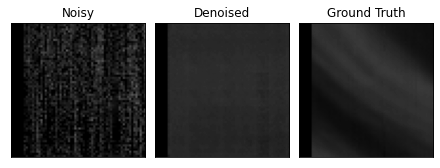

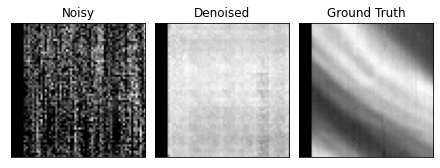

RMSE-NZ  Pred=0.0533  Noisy=0.0960 BEST
MAE-NZ   Pred=0.0416  Noisy=0.0792 BEST
PSNR     Pred=12.7 dB Noisy=7.5 dB BEST
Accuracy Pred=0.22    Noisy=0.07 BEST
SSM      Pred=0.78    Noisy=0.21
HOG MSE  Pred=0.12    Noisy=0.20
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_02_01_9_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_02_01_9_nitid_idx076.tif


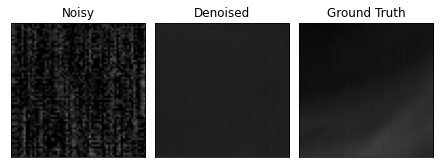

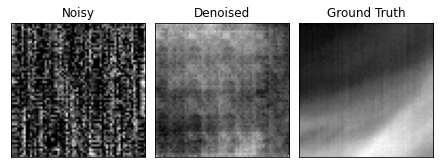

RMSE-NZ  Pred=0.0558  Noisy=0.0971 BEST
MAE-NZ   Pred=0.0495  Noisy=0.0798 BEST
PSNR     Pred=12.8 dB Noisy=8.0 dB BEST
Accuracy Pred=0.07    Noisy=0.07 BEST
SSM      Pred=0.82    Noisy=0.14
HOG MSE  Pred=0.14    Noisy=0.15
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_03_00_9_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_03_00_9_nitid_idx076.tif


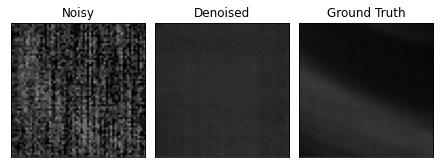

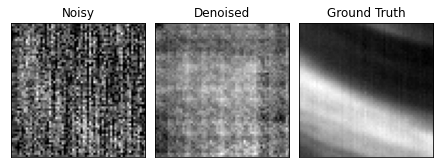

RMSE-NZ  Pred=0.0809  Noisy=0.1540 BEST
MAE-NZ   Pred=0.0677  Noisy=0.1226 BEST
PSNR     Pred=8.9 dB Noisy=3.3 dB BEST
Accuracy Pred=0.10    Noisy=0.05 BEST
SSM      Pred=0.68    Noisy=0.07
HOG MSE  Pred=0.24    Noisy=0.19
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0569_02_01_11_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0569_02_01_11_nitid_idx076.tif


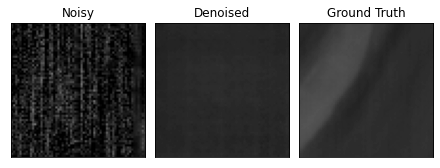

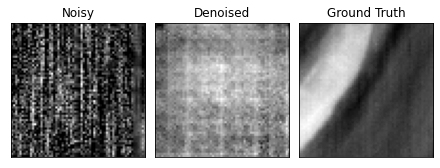

RMSE-NZ  Pred=0.0728  Noisy=0.1426 BEST
MAE-NZ   Pred=0.0514  Noisy=0.1207 BEST
PSNR     Pred=13.2 dB Noisy=7.4 dB BEST
Accuracy Pred=0.18    Noisy=0.04 BEST
SSM      Pred=0.76    Noisy=0.11
HOG MSE  Pred=0.25    Noisy=0.19
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_02_01_10_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_02_01_10_nitid_idx076.tif


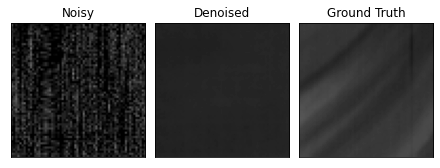

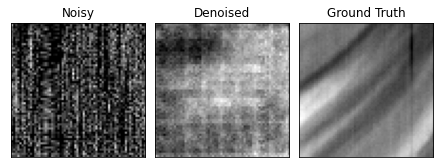

RMSE-NZ  Pred=0.0773  Noisy=0.1416 BEST
MAE-NZ   Pred=0.0675  Noisy=0.1219 BEST
PSNR     Pred=12.8 dB Noisy=7.5 dB BEST
Accuracy Pred=0.04    Noisy=0.04 WORST
SSM      Pred=0.76    Noisy=0.12
HOG MSE  Pred=0.25    Noisy=0.27
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_03_00_11_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_03_00_11_nitid_idx076.tif


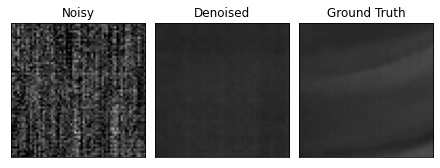

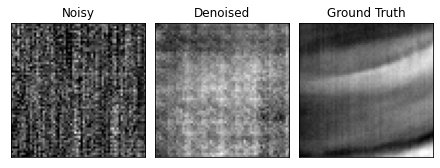

RMSE-NZ  Pred=0.0429  Noisy=0.1312 BEST
MAE-NZ   Pred=0.0336  Noisy=0.1051 BEST
PSNR     Pred=16.9 dB Noisy=7.2 dB BEST
Accuracy Pred=0.19    Noisy=0.05 BEST
SSM      Pred=0.87    Noisy=0.07
HOG MSE  Pred=0.18    Noisy=0.18
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0706_02_01_3_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0706_02_01_3_nitid_idx076.tif


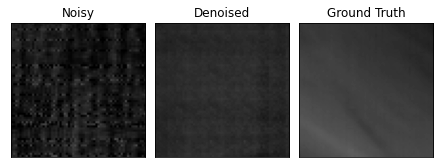

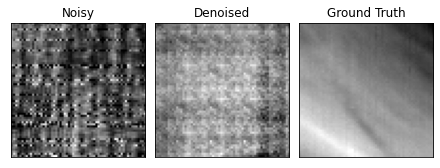

RMSE-NZ  Pred=0.0933  Noisy=0.1634 BEST
MAE-NZ   Pred=0.0804  Noisy=0.1488 BEST
PSNR     Pred=11.8 dB Noisy=7.0 dB BEST
Accuracy Pred=0.06    Noisy=0.01 BEST
SSM      Pred=0.73    Noisy=0.28
HOG MSE  Pred=0.13    Noisy=0.12
******************************************************


In [11]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = \
                dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid = \
                dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )